In [29]:
!pip install catboost

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6281716	total: 7.31ms	remaining: 1.45s
5:	learn: 0.6139987	total: 8.41ms	remaining: 1.39s
6:	learn: 0.6007221	total: 9.56ms	remaining: 1.35s
7:	learn: 0.5865261	total: 10.7ms	remaining: 1.32s
8:	learn: 0.5760173	total: 12.3ms	remaining: 1.35s
9:	learn: 0.5641784	total: 13.5ms	remaining: 1.33s
10:	learn: 0.5538549	total: 14.7ms	remaining: 1.32s
11:	learn: 0.5413434	total: 16ms	remaining: 1.32s
12:	learn: 0.5308262	total: 17.2ms	remaining: 1.31s
13:	learn: 0.5187893	total: 18.8ms	remaining: 1.33s
14:	learn: 0.5084890	total: 20.2ms	remaining: 1.33s
15:	learn: 0.4986254	total: 21.6ms	remaining: 1.33s
16:	learn: 0.4890714	total: 22.9ms	remaining: 1.32s
17:	learn: 0.4790883	total: 24.1ms	remaining: 1.32s
18:	learn: 0.4700108	total: 25.3ms	remaining: 1.31s
19:	learn: 0.4630325	total: 26.4ms	remaining: 1.29s
20:	learn: 0.4536134	total: 28ms	remaining: 1.3s
21:	learn: 0.4429695	total: 29.2ms	remaining: 1.3s
22:	learn: 0.4362340	tota

In [31]:
import numpy as np
new_patient = np.array([[1080185,10, 10, 10, 8, 6, 1, 8, 9, 1]])

prediction = classifier.predict(new_patient)
probability = classifier.predict_proba(new_patient)[:, -1]

print(f"Predicted Class: {prediction[0]}")
print(f"Probability of Malignancy: {probability[0]:.2f}")


Predicted Class: 4
Probability of Malignancy: 1.00


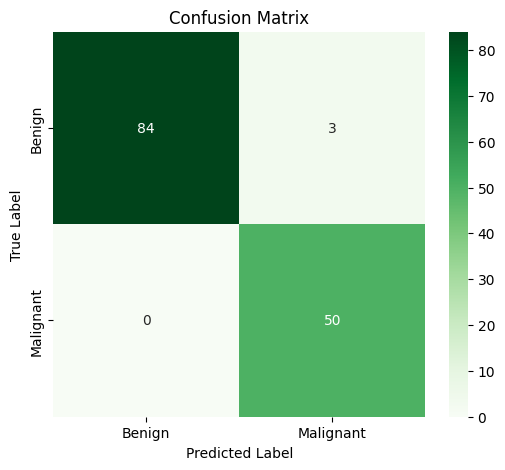

Confusion Matrix:
 [[84  3]
 [ 0 50]]

Accuracy: 0.9781021897810219

Classification Report:
               precision    recall  f1-score   support

           2       1.00      0.97      0.98        87
           4       0.94      1.00      0.97        50

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137

Accuracy: 97.26 %
Standard Deviation: 2.03 %


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#  1. Confusion Matrix Heatmap
def plot_confusion_matrix(y_test, y_pred, class_labels):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

#  2. Classification Report
def print_classification_report(y_test, y_pred):
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


class_labels = ["Benign", "Malignant"]

plot_confusion_matrix(y_test, y_pred, class_labels)
print_classification_report(y_test, y_pred)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

